In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import shapely.geometry as sgeom
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

import matplotlib.ticker as ticker
from string import ascii_lowercase, ascii_uppercase

import numpy as np
import matplotlib as mpl
import glob
%matplotlib inline

In [2]:
cesta = '/mnt/data04/model/CMAM/0A.daily/composites_woSSW_DJFonly/'
timescale = 20
plt.rcParams.update({'font.size': 22})

In [3]:
var_ls = ['Fz_plumb', 'Fx_plumb', 'Fy_plumb'] #'ua'
what = 'anomalies'

In [4]:
timescale = 20
e_type_ls = ['himalayas']#, 'eastasia', 'westamer']

ds_ls = []
for var in var_ls:
    da_ls = []
    for i,e_type in enumerate(e_type_ls):
        da = xr.open_dataarray('{}{}_{}_comp_{}_{}days.nc'.format(cesta, var, what, e_type, timescale))
        da['plev'] = da.plev/100.

        da_ls.append(da)
    da_conc = xr.concat(da_ls, dim = 'e_type')
    da_conc['e_type'] = e_type_ls 
    ds_ls.append(da_conc)
    
ds_all = xr.merge(ds_ls)


In [5]:
timescale = 20
e_type_ls = ['himalayas']#, 'eastasia', 'westamer']

ds_ls = []
for var in var_ls[:1]:
    da_ls = []
    for i,e_type in enumerate(e_type_ls):
        da = xr.open_dataarray('{}{}_{}_comp_{}_{}days.nc'.format(cesta, var, 'absolute', e_type, timescale))
        da['plev'] = da.plev/100.

        da_ls.append(da)
    da_conc = xr.concat(da_ls, dim = 'e_type')
    da_conc['e_type'] = e_type_ls 
    ds_ls.append(da_conc)
    
ds_all_abs = xr.merge(ds_ls)


In [10]:
ds_all_abs_sel.Fz_plumb.sel(**sel_dict)

<xarray.DataArray 'Fz_plumb' (e_type: 1, lat: 48, lon: 96)>
array([[[-2.68467809e-04, -2.71721325e-04, -2.98377394e-04, ...,
         -1.21815511e-05, -6.63401055e-05, -9.23927318e-05],
        [ 3.70588700e-04,  2.84909103e-04,  1.63564209e-04, ...,
          2.43322279e-03,  1.48765367e-03,  1.01779227e-03],
        [ 5.55982611e-03,  5.62182320e-03,  5.69970651e-03, ...,
          1.14464450e-02,  8.20699447e-03,  7.11426905e-03],
        ...,
        [ 1.47789367e-01,  1.54594021e-01,  1.66768611e-01, ...,
          5.84837403e-02,  9.07715832e-02,  1.05922631e-01],
        [ 5.22724842e-02,  5.45925860e-02,  5.87200978e-02, ...,
          2.80365981e-02,  3.58395560e-02,  3.96683587e-02],
        [ 7.49428809e-03,  7.83065711e-03,  8.48821710e-03, ...,
          5.12294884e-03,  5.79416342e-03,  6.12737294e-03]]])
Coordinates:
  * lon      (lon) float64 0.0 3.75 7.5 11.25 15.0 ... 345.0 348.8 352.5 356.2
  * lat      (lat) float64 -87.16 -83.48 -79.78 -76.07 ... 79.78 83.48 87.16
    plev     float64 70.0
    lag      int64 0
  * e_type   (e_type) <U9 'himalayas'

/home/kuchar/.conda/envs/moje/lib/python3.9/site-packages/xarray/plot/facetgrid.py:394: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


Fz_plumb_anomalies_all_20days_lag0_only70hPa.pdf


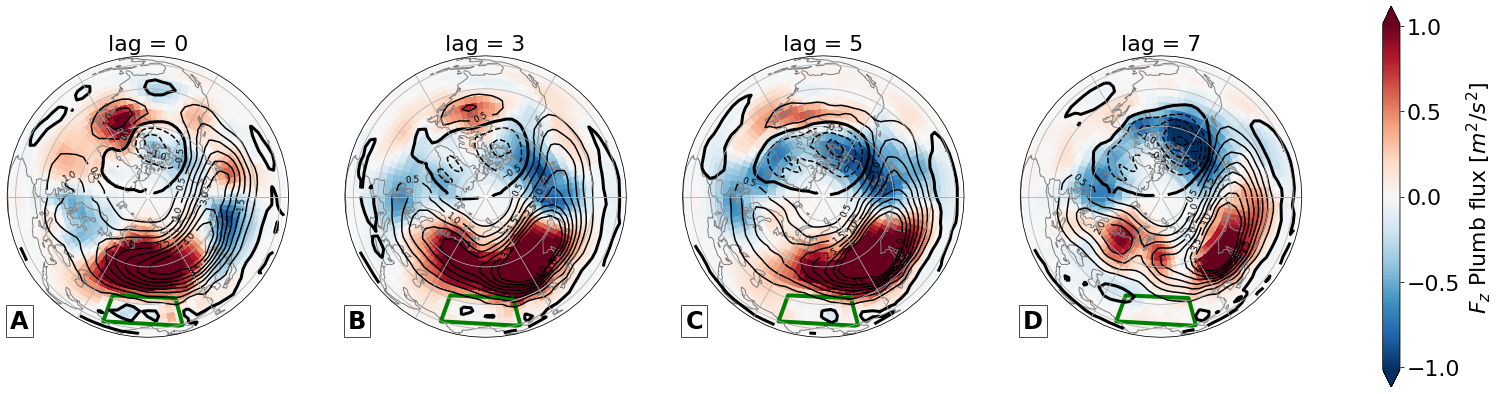

In [6]:
projection = ccrs.Orthographic(90, 90)
lon = ds_all.lon.values
lat = ds_all.lat.values
#ax = plt.axes(projection=projection, aspect = 'auto')
ch_lev = 70
sel_dict = dict(lag = [0,3,5,7], plev = ch_lev)#,70,30])#[100,80,70,50,30,10])
ds_all_sel = ds_all.sel(**sel_dict)
ds_all_sel.Fz_plumb.attrs['units'] = r'$m^2/s^2$'
ds_all_sel.Fz_plumb.attrs['long_name'] = r'$F_z$ Plumb flux'
ds_all_abs_sel = ds_all_abs.sel(**sel_dict)
p = ds_all_sel.Fz_plumb.plot(col = 'lag', subplot_kws={'projection': projection},\
                             transform=ccrs.PlateCarree(), size = 7, \
                             robust = True)

box = sgeom.box(minx=70, maxx=105, miny=20, maxy=42)
box2 = sgeom.box(minx=110, maxx=145, miny=27.5, maxy=52)
box3 = sgeom.box(minx=-125, maxx=-102.5, miny=27.5, maxy=52)

for i,(ax, sel_dict) in enumerate(zip(p.axes.flat, p.name_dicts.flat)):
    ax.coastlines(color = 'gray')
    ax.gridlines()
    
    ax.text(0.01, 0.1, ascii_uppercase[i], transform=ax.transAxes,
                      fontsize=24, fontweight='bold', va='top', 
            bbox={'alpha': 0.7, 'facecolor': 'white'})
    ax.add_geometries([box], ccrs.PlateCarree(), \
                      facecolor=['none'], edgecolor=['green'], \
                      linewidth = [4])
   

   
    pf = ds_all_abs_sel.Fz_plumb.sel(**sel_dict).squeeze().values
    arr = np.arange(-4,4.5,0.5)
    arr = arr[np.where(arr != 0)]

    CP = ax.contour(lon, lat, pf, transform=ccrs.PlateCarree(), colors = 'k', levels = arr)
    ax.clabel(CP, fontsize=9, inline=1)
    CP = ax.contour(lon, lat, pf, transform=ccrs.PlateCarree(), colors = 'k', levels = [0], \
                    linewidths = 3)
    #ax.set_title(titles[i], fontdict = dict(fontweight = 'bold', fontsize = 24))

    """
    ax.quiver(lon, lat, ds_all_sel.Fx_plumb.sel(**sel_dict).values, \
              ds_all_sel.Fy_plumb.sel(**sel_dict).values, \
              transform=ccrs.PlateCarree(), scale = 10000)
    """
    
outfile='{}_{}_{}_{}days_lag0_only{}hPa.pdf'.format('Fz_plumb', what, 'all', timescale, \
                                                   ch_lev)
print(outfile)
plt.savefig(outfile, bbox_inches='tight')

In [7]:
plt.rcParams.update({'font.size': 22})

projection = ccrs.PlateCarree(central_longitude=180)
fmt = ticker.LogFormatterMathtext()
fmt.create_dummy_axis()
#ax = plt.axes(projection=projection, aspect = 'auto')
ch_lev = 70
sel_dict = dict(lag = 0, plev = ch_lev)#,70,30])#[100,80,70,50,30,10])
ds_all_sel = ds_all.sel(**sel_dict)
ds_all_sel.Fz_plumb.attrs['units'] = r'$m^2/s^2$'
ds_all_sel.Fz_plumb.attrs['long_name'] = r'$F_z$ Plumb flux'
#ds_all_abs_sel = ds_all_abs.sel(**sel_dict)
p = ds_all_sel.Fz_plumb.plot(col = 'e_type', subplot_kws={'projection': projection},\
                             transform=ccrs.PlateCarree(), size = 7, \
                             aspect=ds_all_sel.dims['lon']/ds_all_sel.dims['lat'], \
                             robust = True, col_wrap = 1, cbar_kwargs = {'orientation': 'horizontal', \
                                                                         'pad': 0.05})

box = sgeom.box(minx=70, maxx=105, miny=20, maxy=42)
box2 = sgeom.box(minx=110, maxx=145, miny=27.5, maxy=52)
box3 = sgeom.box(minx=-125, maxx=-102.5, miny=27.5, maxy=52)

for i,(ax, sel_dict) in enumerate(zip(p.axes.flat, p.name_dicts.flat)):
    ax.coastlines(color = 'gray')
    ax.gridlines(xlocs = [-180, -90, 0, 90, 180])
    ax.set_yticks([0, 20, 40, 60, 80], crs=ccrs.PlateCarree())
    lat_formatter = LatitudeFormatter(number_format='.1f', \
                                      degree_symbol='')        
    ax.yaxis.set_major_formatter(lat_formatter)

    if i == 2:
        ax.set_xticks([-90, 0, 90, 180], crs=ccrs.PlateCarree())
        lon_formatter = LongitudeFormatter(number_format='.1f', \
                                       degree_symbol='', \
                                       dateline_direction_label=True)    
        ax.xaxis.set_major_formatter(lon_formatter)
    
    ax.set_extent([0, 270, 20, 80])#ax.set_extent([-180, 180, -10, 80])
    ax.set_aspect('auto')
    
    
    region = sel_dict['e_type']
    if region == 'westamer':
           ax.add_geometries([box3], ccrs.PlateCarree(), \
                      facecolor=['none'], edgecolor=['green'], \
                      linewidth = [4])
    elif region == 'eastasia':
           ax.add_geometries([box2], ccrs.PlateCarree(), \
                      facecolor=['none'], edgecolor=['green'], \
                      linewidth = [4])
    elif region == 'himalayas':
           ax.add_geometries([box], ccrs.PlateCarree(), \
                      facecolor=['none'], edgecolor=['green'], \
                      linewidth = [4])
    """
    ax.add_geometries([box,box2,box3], ccrs.PlateCarree(), \
                      facecolor=['none','none','none'], edgecolor=['green','black','yellow'], \
                      linewidth = [3,3,3], alpha=0.7)
    """
    #pf = ds_all_abs_sel.Fz_plumb.sel(**sel_dict).values
    arr = np.arange(-4,4.5,0.5)
    arr = arr[np.where(arr != 0)]

    #CP = ax.contour(lon, lat, pf, transform=ccrs.PlateCarree(), colors = 'k', levels = arr)
    #ax.clabel(CP, fontsize=9, inline=1)
    #CP = ax.contour(lon, lat, pf, transform=ccrs.PlateCarree(), colors = 'k', levels = [0], \
    #                linewidths = 3)
    ax.set_title(titles[i], fontdict = dict(fontweight = 'bold', fontsize = 24))

    ax.quiver(lon, lat, ds_all_sel.Fx_plumb.sel(**sel_dict).values, \
              ds_all_sel.Fy_plumb.sel(**sel_dict).values, \
              transform=ccrs.PlateCarree(), scale = 5000)
    ax.set_ylabel('')
    
outfile='{}_{}_{}_{}days_lag0_only{}hPa.pdf'.format('Plumball', what, 'all', timescale, \
                                                   ch_lev)
print(outfile)
#plt.savefig(outfile, bbox_inches='tight')

ValueError: IndexVariable objects must be 1-dimensional